<a href="https://colab.research.google.com/github/chaiyawat19/DataScinceLab/blob/main/lab4_2_dsformarketing_prepbank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Process
# 1. Get Data


In [ ]:
import pandas as pd
df = pd.read_csv("/content/bank-data.csv")
df

In [ ]:
df.head(20)

# 2. Clean Data and Data Preparation


In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

Use the attribute mean to fill in the missing value

In [ ]:
df['income'] = df['income'].fillna(df['income'].mean())

In [ ]:
df.head(20)

Use the attribute mean for all samples belonging to
the same class as the given tuple

In [ ]:
df['income'] = df['income'].fillna(df.groupby('credit')['income'].transform('mean'))

In [ ]:
df.head(20)

In [ ]:
df.groupby('credit')['income'].mean()

Check replace null all

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes

LabelEncoder การแปลงข้อมูลจาก object เป็น int

In [ ]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
df['sex'] = labelencoder.fit_transform(df['sex'])
df['region'] = labelencoder.fit_transform(df['region'])
df['married'] = labelencoder.fit_transform(df['married'])
df['car'] = labelencoder.fit_transform(df['car'])
df['save_act'] = labelencoder.fit_transform(df['save_act'])
df['current_act'] = labelencoder.fit_transform(df['current_act'])
df['mortgage'] = labelencoder.fit_transform(df['mortgage'])
df['credit'] = labelencoder.fit_transform(df['credit'])

In [ ]:
df.head(10)

In [ ]:
df.tail(5)

In [ ]:
df.dtypes

Feature Selection

In [ ]:
df = df.drop(['id'],axis=1)

In [ ]:
df

In [ ]:
df.columns

# 3. Create Model

Decision Tree Model


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

x = df.drop(['credit'],axis=1)
y = df.credit


# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

train_data, test_data, train_y, test_y = train_test_split(x, y, train_size=0.70, shuffle=False)


# Create Decision Tree classifer object
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=None)

# Train Decision Tree Classifer
decision_tree_classifier.fit(train_data,train_y)

y_predict = decision_tree_classifier.predict(test_data)
y_predict

In [ ]:
decision_tree_classifier

# 4. Evaluation Model

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y,y_predict))

print decision graph

In [ ]:
import graphviz
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(decision_tree_classifier, out_file=None, feature_names=x.columns, class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('dt.png')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
feature_importances = pd.DataFrame(decision_tree_classifier.feature_importances_, index=x.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

# Others Data Preparation

การ rescale สำหรับค่า income โดยวิธี MinMaxScaler

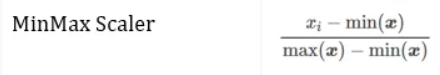

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# scale features
scaler = MinMaxScaler()
model=scaler.fit(df[['income']])
scaled_data=model.transform(df[['income']])
df["income_trans"] = scaled_data
df

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

x1 = df.drop(['credit','income'],axis=1)
y1 = df.credit


# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

train_data, test_data, train_y, test_y = train_test_split(x1, y1, train_size=0.70, shuffle=False)


# Create Decision Tree classifer object
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=None)

# Train Decision Tree Classifer
decision_tree_classifier.fit(train_data,train_y)

y_predict = decision_tree_classifier.predict(test_data)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y,y_predict))

การ rescale สำหรับค่า income โดยวิธี StandardScaler

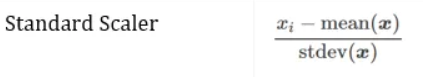

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s_scaler = scaler.fit_transform(df[['income']])
df["income_strans"] = s_scaler
df

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

x2 = df.drop(['credit','income'],axis=1)
y2 = df.credit


# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

train_data, test_data, train_y, test_y = train_test_split(x2, y2, train_size=0.70, shuffle=False)


# Create Decision Tree classifer object
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=None)

# Train Decision Tree Classifer
decision_tree_classifier.fit(train_data,train_y)

y_predict = decision_tree_classifier.predict(test_data)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y,y_predict))